# Ödev 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/iris.csv')
y = df.species
df = df.drop('species', axis=1)
df_org = df.copy()

## Soru 1
Veri setinde kaç tane küme olduğunu "dirsek yöntemi" (elbow method) ile hesaplayınız ve bunun için bir "Scree Plot" grafiği oluşturunuz.

In [3]:
from sklearn.decomposition import PCA

In [4]:
df = pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns)

In [5]:
pca = PCA(n_components=4)

In [6]:
pca_fit = pca.fit(df)

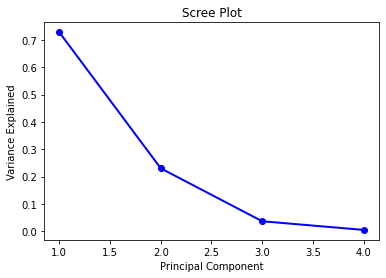

In [7]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

## Soru 2
K-means kümeleme (clustering) algoritmasını kullanarak iris veri seti için bir kümeleme modeli elde ediniz.

In [8]:
from sklearn.cluster import KMeans

In [9]:
km = KMeans(n_clusters=3, random_state=1, init='k-means++', n_init=10)

In [10]:
km.fit(df)

KMeans(n_clusters=3, random_state=1)

In [11]:
km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': 1,
 'tol': 0.0001,
 'verbose': 0}

## Soru 3
Model performansını gösteren bir grafik oluşturunuz (sns.scatterplot ile olabilir).

In [12]:
import seaborn as sns

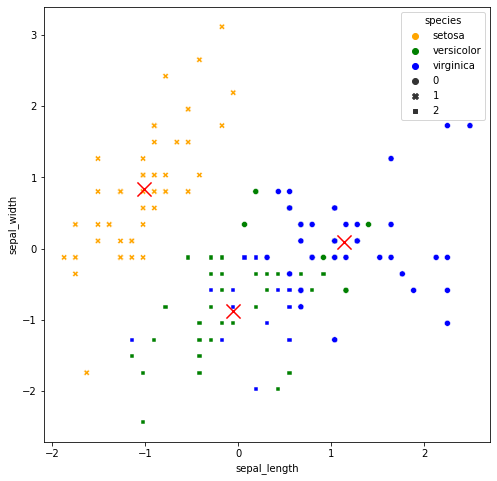

In [13]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='sepal_length',y='sepal_width',data=df, hue=y,style=km.labels_, palette=["orange","green","blue"])

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],marker='x',s=200,c='red')

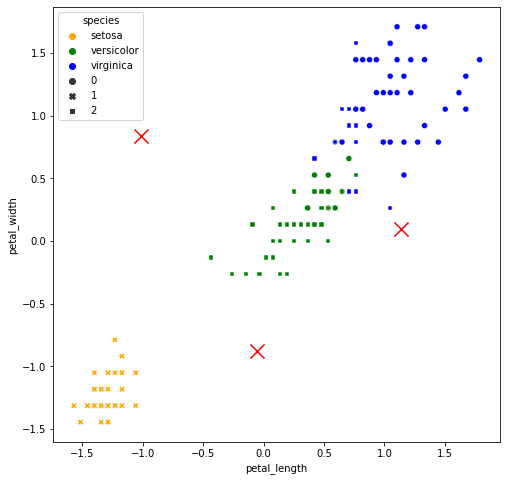

In [14]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='petal_length',y='petal_width',data=df, hue=y,style=km.labels_, palette=["orange","green","blue"])

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],marker='x',s=200,c='red')